# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("class_keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
response_content_btc = response_data_btc.content
btc_data = response_data_btc.json()
btc_value = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
eth_data = response_data_eth.json()
eth_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc_value = btc_value * my_btc
my_eth_value = eth_value * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $73156.80
The current value of your 5.3 ETH is $22613.72


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [27]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-28", tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(tickers, timeframe, end = today, limit = 1000).df.sort_index(ascending=False)


# Preview DataFrame
df_portfolio.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2021-10-28 00:00:00-04:00  114.71  114.8250  114.570  114.65  4971007.0   
2021-10-27 00:00:00-04:00  114.66  114.9150  114.425  114.77  6817074.0   
2021-10-26 00:00:00-04:00  114.25  114.3800  114.110  114.37  5284755.0   
2021-10-25 00:00:00-04:00  114.06  114.2700  114.060  114.17  7088133.0   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.895  114.07  3309637.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2021-10-28 00:00:00-04:00  455.46  458.40  455.45  458.27  43081788.0  
2021-10-27 00:00:00-04:00  456.45  457.16  453.86  453.92  48219255.0  
2021-10-26 00:00:00-04:00  457.20  458.49  455.56  455.97  49865704.0  
2021-10-25 00:00:00-04:00  454.28  455.90  452.39  455.48  37918548.0  
2021-10-22 00:00:00-04:00  453.13  454.67  451.05  453.13  50771701.0

In [28]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.65
Current SPY closing price: $458.27


In [29]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22913.50
The current value of your 200 AGG shares is $22930.00


### Savings Health Analysis

In [30]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
savings = [crypto, shares]

# Create savings DataFrame
df_savings = pd.DataFrame(savings, index = ["crypto", "shares"], columns = ["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,95770.522
shares,45843.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

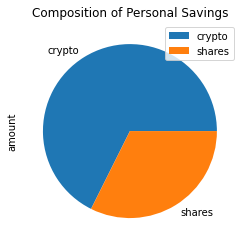

In [31]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount", title = "Composition of Personal Savings")

In [33]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print("Way to go! You have enough money in your savings fund!")
elif total_savings == emergency_fund:
    print("You have enough money in your savings fund, but be careful!")
else:
    print(f"You are {emergency_fund - total_savings} dollars away from reaching your goal")

Way to go! You have enough money in your savings fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [34]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-28', tz='America/New_York').isoformat()

In [40]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(tickers, timeframe, end = today, limit = 1000).df
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-11-07 00:00:00-05:00  109.58  109.61  109.49  109.570  1617243.0     NaN   
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734.0  258.46   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380.0  257.73   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306.0  257.73   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797.0  257.32   

                                                               
                             high     low   close      volume  
time                                                           
2017-11-07 00:00:00-05:00     NaN     NaN     NaN         NaN  
2017-11-08 00:00:00-05:00  259.22  258.15  259.13  32174191.0  
2017-11-09 00:00:00-05:00  258.39  256.36  258.20  75322217.0  
2017-11-10 00:00:00-05:00  258.21  257.37  258.08  35755951.0  
2017-11-13 00:00:00-05:00  258.59  257.27  258.34  31963013.0

In [54]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(portfolio_data = df_stock_data, weights = [.60,.40], num_simulation = 500, num_trading_days = 252*30)

In [55]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-11-07 00:00:00-05:00  109.58  109.61  109.49  109.570  1617243.0   
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734.0   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380.0   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306.0   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-11-07 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2017-11-08 00:00:00-05:00    -0.000639  258.46  259.22  258.15  259.13   
2017-11-09 00:00:00-05:00    -0.000731  257.73  258.39  256.36  258.20   
2017-11-10 00:00:00-05:00    -0.003976  257.73  258.21  257.37  258.08   
2017-11-13 00:00:00-05:00    -0.000046  257.32  258.59  257.27  258.34   

                                                    
                               volume daily_return  
time                                                
2017-11-07 00:00:00-05:00         NaN          NaN  
2017-11-08 00:00:00-05:00  32174191.0          NaN  
2017-11-09 00:00:00-05:00  75322217.0    -0.003589  
2017-11-10 00:00:00-05:00  35755951.0    -0.000465  
2017-11-13 00:00:00-05:00  31963013.0     0.001007

In [56]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ted\desktop\10.21\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003520,0.999860,0.997916,1.000207,1.004872,0.993825,1.005508,1.001878,0.994763,1.004163,...,1.005824,0.996551,1.001362,0.999985,1.007133,1.000097,0.993147,1.012530,0.990940,1.004328
2,1.007931,0.999619,0.998107,1.007183,1.003437,0.992613,1.003790,1.010999,0.992763,1.002451,...,1.002578,0.993612,1.004101,1.004073,1.013467,0.997173,0.986638,1.004350,0.994572,1.007376
3,1.008695,1.002674,1.005855,1.004787,1.003097,0.997883,0.999500,1.021470,0.988938,1.002441,...,1.002967,0.990779,0.993892,0.999357,1.028777,0.985959,0.985646,1.010599,0.988406,1.011049
4,1.011628,0.998667,1.004250,0.992645,0.996014,1.001315,1.010261,1.029684,0.989559,1.000295,...,1.000528,0.993361,0.998832,0.999658,1.035404,0.982277,0.993407,1.005502,0.991087,1.006218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.193854,5.823581,6.503806,5.064783,3.914197,14.986835,8.035632,10.965119,10.192538,6.687120,...,9.624347,3.930281,3.231869,8.662349,3.685695,10.758767,6.742936,7.770772,6.656306,6.739056
7557,11.196256,5.802690,6.558439,5.085194,3.915451,15.112879,7.982768,10.911954,10.174549,6.722400,...,9.601523,3.923171,3.243208,8.726590,3.673370,10.889278,6.739212,7.768269,6.684361,6.755642
7558,11.181003,5.823394,6.586909,5.120120,3.952385,15.323353,7.971266,10.924148,10.176250,6.711094,...,9.610261,3.909104,3.225208,8.712359,3.645180,10.926927,6.699565,7.792823,6.688782,6.758999
7559,11.271537,5.767558,6.606796,5.085528,3.964448,15.156000,7.999250,10.893233,10.152318,6.707956,...,9.571962,3.892681,3.243061,8.698620,3.636379,10.879127,6.652020,7.776452,6.714255,6.815100


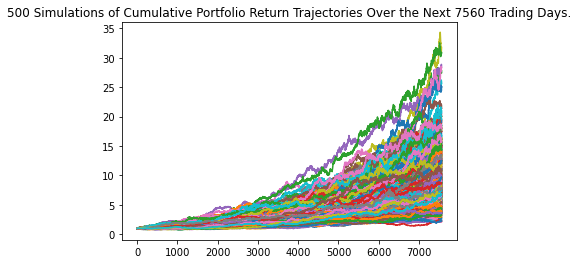

In [57]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

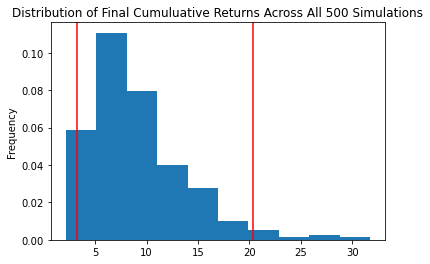

In [58]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print (tbl)

count           500.000000
mean              9.087658
std               4.708187
min               2.127769
25%               5.771328
50%               8.029723
75%              11.204962
max              31.748222
95% CI Lower      3.245069
95% CI Upper     20.327537
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [60]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $64901.39 and $406550.74


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [61]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*(20000 * 1.5),2)
ci_upper = round(tbl[9]*(20000 * 1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $97352.08 and $609826.11


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [62]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(portfolio_data = df_stock_data, weights = [.60,.40], num_simulation = 500, num_trading_days = 252*5)
MC_fiveyear.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-11-07 00:00:00-05:00  109.58  109.61  109.49  109.570  1617243.0   
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734.0   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380.0   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306.0   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-11-07 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2017-11-08 00:00:00-05:00    -0.000639  258.46  259.22  258.15  259.13   
2017-11-09 00:00:00-05:00    -0.000731  257.73  258.39  256.36  258.20   
2017-11-10 00:00:00-05:00    -0.003976  257.73  258.21  257.37  258.08   
2017-11-13 00:00:00-05:00    -0.000046  257.32  258.59  257.27  258.34   

                                                    
                               volume daily_return  
time                                                
2017-11-07 00:00:00-05:00         NaN          NaN  
2017-11-08 00:00:00-05:00  32174191.0          NaN  
2017-11-09 00:00:00-05:00  75322217.0    -0.003589  
2017-11-10 00:00:00-05:00  35755951.0    -0.000465  
2017-11-13 00:00:00-05:00  31963013.0     0.001007

In [63]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ted\desktop\10.21\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999885,0.995772,0.998469,0.998629,1.003648,1.007851,0.994227,1.001775,1.008090,0.999929,...,1.002019,1.003860,0.999988,1.000189,1.000628,0.994474,1.001221,1.002270,0.997334,1.002936
2,1.011954,0.998251,1.001121,1.002895,1.011533,1.012292,0.997199,0.998814,1.019221,0.998714,...,0.996420,1.003806,1.007745,1.000955,0.999362,0.987724,1.007994,0.998802,1.011357,1.004436
3,1.011239,0.996702,1.009953,1.005173,1.011655,1.012533,1.000206,0.997783,1.014723,0.998151,...,0.999591,0.999872,1.008042,1.010352,0.996312,0.994667,1.014599,1.000943,1.009878,1.010835
4,1.003367,0.996779,1.011373,1.005771,1.026088,1.016975,1.009385,0.995193,1.016246,0.993660,...,0.988352,1.010746,1.014234,1.010669,0.986405,1.003488,1.014689,0.992689,1.006637,1.020999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.502008,1.777700,1.617623,1.150814,1.397046,1.479361,1.384718,1.582379,1.565336,1.276592,...,1.503394,2.045909,1.177980,1.102190,1.379569,1.122220,1.636142,1.956989,1.011934,1.664717
1257,1.499028,1.780783,1.618301,1.152618,1.406644,1.475423,1.394126,1.590427,1.553689,1.285228,...,1.498397,2.049543,1.171298,1.107494,1.379421,1.125658,1.641811,1.948650,1.008258,1.667314
1258,1.493182,1.783530,1.620644,1.158815,1.413215,1.471012,1.394113,1.592497,1.548541,1.280599,...,1.490679,2.047678,1.170406,1.104777,1.375296,1.120552,1.659930,1.948818,1.018241,1.664562
1259,1.490942,1.804172,1.627554,1.146825,1.396289,1.469301,1.397807,1.594441,1.549260,1.286589,...,1.485037,2.068180,1.190805,1.105627,1.377835,1.130909,1.661302,1.946671,1.017996,1.654760


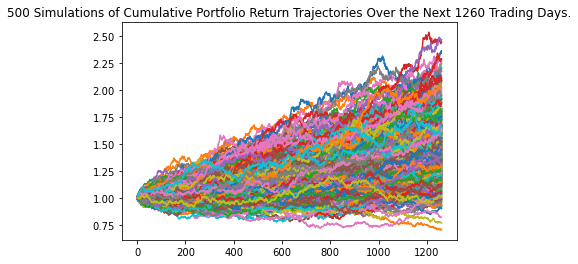

In [64]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

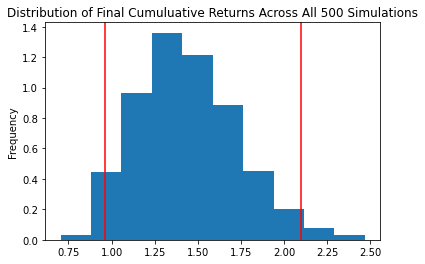

In [65]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print (tbl_five)

count           500.000000
mean              1.440161
std               0.290269
min               0.704102
25%               1.226224
50%               1.413898
75%               1.625260
max               2.467840
95% CI Lower      0.964039
95% CI Upper      2.097287
Name: 1260, dtype: float64


In [67]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $194704.17 and $1219652.22


### Ten Years Retirement Option

In [68]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(portfolio_data = df_stock_data, weights = [.60,.40], num_simulation = 500, num_trading_days = 252*10)
MC_tenyear.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-11-07 00:00:00-05:00  109.58  109.61  109.49  109.570  1617243.0   
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734.0   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380.0   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306.0   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-11-07 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2017-11-08 00:00:00-05:00    -0.000639  258.46  259.22  258.15  259.13   
2017-11-09 00:00:00-05:00    -0.000731  257.73  258.39  256.36  258.20   
2017-11-10 00:00:00-05:00    -0.003976  257.73  258.21  257.37  258.08   
2017-11-13 00:00:00-05:00    -0.000046  257.32  258.59  257.27  258.34   

                                                    
                               volume daily_return  
time                                                
2017-11-07 00:00:00-05:00         NaN          NaN  
2017-11-08 00:00:00-05:00  32174191.0          NaN  
2017-11-09 00:00:00-05:00  75322217.0    -0.003589  
2017-11-10 00:00:00-05:00  35755951.0    -0.000465  
2017-11-13 00:00:00-05:00  31963013.0     0.001007

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ted\desktop\10.21\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010646,1.000195,0.990699,0.997932,1.003588,0.997957,0.990987,0.993531,0.994888,1.006671,...,1.000727,0.997302,0.992181,1.001401,1.001935,1.003356,1.010105,0.995419,1.000094,1.007124
2,0.998216,0.998599,0.992916,0.987509,1.010686,1.003138,0.987078,0.994932,0.987225,1.014748,...,1.005963,0.995055,0.996235,0.996434,1.010306,1.000714,1.021638,1.003820,1.004888,1.000069
3,0.999886,1.003503,0.993219,0.986817,1.005176,1.002924,0.985587,1.002311,0.997011,1.015507,...,1.012230,0.993577,1.000471,0.995129,1.015767,1.003821,1.021877,1.009876,1.011941,1.001008
4,0.998232,1.000049,0.986362,0.989767,1.005518,0.997429,0.979155,1.005511,0.995341,1.019695,...,1.018985,0.990615,0.997183,0.991201,1.020070,1.002550,1.028150,1.012407,1.008136,1.000316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.528940,1.855093,1.540848,1.883723,1.591370,2.594515,2.415714,2.396632,2.246648,1.793391,...,2.163105,2.225063,1.854840,2.039914,2.337834,1.883209,2.074008,1.295777,2.862066,2.814585
2517,1.545527,1.855154,1.541369,1.887079,1.593651,2.558392,2.414414,2.411776,2.256005,1.806715,...,2.169329,2.254701,1.862468,2.035448,2.332862,1.884854,2.080331,1.293239,2.867714,2.810126
2518,1.535484,1.853254,1.532674,1.886766,1.575591,2.552782,2.419130,2.425986,2.276583,1.796834,...,2.164128,2.236176,1.856602,2.038664,2.332829,1.881705,2.074165,1.286921,2.851303,2.848319
2519,1.547541,1.857094,1.557788,1.885670,1.589912,2.552817,2.419560,2.410319,2.258998,1.780878,...,2.161016,2.242046,1.854014,2.046979,2.346371,1.880363,2.058533,1.299842,2.872479,2.858824


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

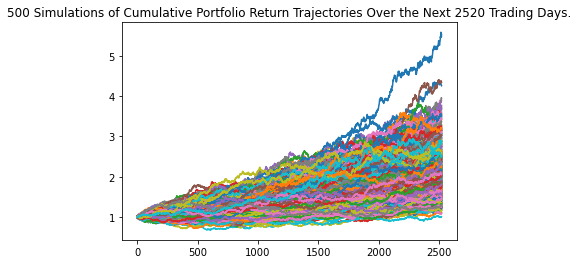

In [70]:
# Plot simulation outcomes
MC_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

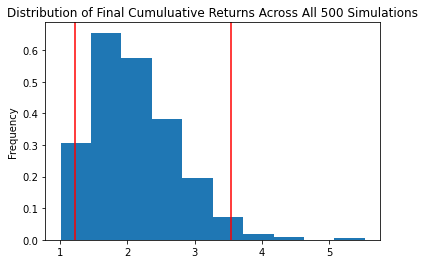

In [71]:
# Plot probability distribution and confidence intervals
MC_tenyear.plot_distribution()

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print (tbl_ten)

count           500.000000
mean              2.119474
std               0.622463
min               1.009461
25%               1.683759
50%               2.024145
75%               2.477344
max               5.530100
95% CI Lower      1.225330
95% CI Upper      3.538517
Name: 2520, dtype: float64


In [73]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $194704.17 and $1219652.22
